# Lead Scoring Case Study Assignment

- __Objective__: Identify potential leads that are most likely to convert into paying customers for X Education.
- __Business Problem__: The current lead conversion rate is 30%, which is below the target rate of 80%. The sales team spends significant time on leads that do not convert, leading to inefficiency.
- __Goal__: Increase the lead conversion rate by focusing sales efforts on 'Hot Leads' that have a higher likelihood of conversion.
- __Business Impact__: Improving the lead conversion rate will increase revenue and optimize the sales team's efforts.


##  Develop Hypotheses

- Hypothesis 1: Leads that spend more time on the website are more likely to convert.
- Hypothesis 2: Certain lead sources (e.g., referrals, specific ads) have higher conversion rates.
- Hypothesis 3: Demographic factors like occupation and country might influence conversion likelihood.


## Steps

1. Data Exploration
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Preparation
5. Feature Selection using RFE
6. Model Building
7. Model Evaluation
8. Results on observations
9. Conclusion on Hypotheses
10. Overall Conclusion

### 1. Data Exploration

In [1]:
# import necessary libraries for data manipulation and visualization

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option("display.max_columns",None)

In [3]:
# Suppress warnings

import warnings
warnings.filterwarnings("ignore")

In [4]:
# read lead dataset

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# inspect shape

df.shape

(9240, 37)

We have 9240 rows and 37 columns in lead dataset

In [6]:
# checking datatype of the variables and # of non-null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like all the variables are in a correct data type. However, we see there are few null values. Let's handle this in next section

In [7]:
# Describing data

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


We see some difference between 75% quantile and max ranges in variables __TotalVisits__, __Total Time Spend on Website__, and __Page Views Per Visit__. We also see in the info() above that there are missing values for these variables. We need to look at these varaibles seperately

---

### 2. Data Cleaning

#### Handling 'Select' Value

Many of the categorical variables have a level called 'Select' which needs to be handled. This may be because customer did not select any option from the list. 'Select' values are as good as a null value, hence, we can convert these to null values.

Some of the categorical variables that have 'Select' value are Specialization, How did you hear about X Education, Lead Profile, City etc


In [8]:
# replace 'Select' value to NaN

df = df.replace('Select', np.nan)

In [9]:
# check the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


As we can see from the above dataframe, we've successfully converted all the 'Select' values to NaN

---

#### Handling Null Values

In [10]:
# check the null values


df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [11]:
# checking in percentage

round((df.isnull().sum()/len(df.index))*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

We see that the variables - How did you hear about X Education(78.46), Lead Profile(74.19), Lead Quality(51.59), Asymmetrique Profile Score(45.65), Asymmetrique Activity Score(45.65), Asymmetrique Activity Index (45.65),Asymmetrique Profile Index(45.65) have missing values more than 40%, we can drop them.

In [12]:
# drop the variables with missing values more than 40%

df = df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index',
                      'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])


In [13]:
# check the shape & columns to validate the dropped variables

print(df.shape)

print(df.columns)

(9240, 30)
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [14]:
# check the other missing values

round((df.isnull().sum()/len(df.index))*100,2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

Handling each variable (impute the missing values)

1. __City__ - Gives us the information of City of the customer

     We have almost 40% of missing values in this variable

In [15]:
# checking the values and finding the percentage of each values in the variable

round(df.City.value_counts(normalize=True)*100,2)

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

58% of values are beloongs to 'Mumbai', we can impute the missing values with it.

In [16]:
#Imputing the missing values in City with Mumbai

df.City = df.City.replace(np.nan, 'Unknown')

In [17]:
# checking if there are any null values

df.City.isnull().sum()

0

---

2. __Specialization__ - The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.'

In [18]:
# checking the values and finding the percentage of each values in the variable

round(df.Specialization.value_counts(normalize=True)*100,2)

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

We have almost 37% of missing values present in this variable. This is perhaps due to customer being a student and do not know what to choose or the customer specialization is not present in the given list. In such scenario, we will impute the missing values with 'Others'

In [19]:
#Imputing the missing values with Others

df.Specialization = df.Specialization.replace(np.nan, 'Unknown')

# checking if there are any null values

df.Specialization.isnull().sum()

0

---

3. __Tags__ - Tags assigned to customers indicating the current status of the lead.

     We have 36.2% of missing values present in this variable.

In [20]:
# checking the values and finding the percentage of each values in the variable

round(df.Tags.value_counts(normalize=True)*100,2)

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

Most of the customers have selected the option 'Will revert after reading the email'. Also, this is a column created by Sales team not by the customer. Accuracy of the tags is unknown. We can drop this column.

In [21]:
# dropping the column

df = df.drop('Tags', axis=1)

---

4. __What matters most to you in choosing a course__ - An option selected by the customer indicating what is their main motto behind doing this course.

     We have 29.3% of missing values present in this variable.

In [22]:
# checking the values and finding the percentage of each values in the variable

round(df["What matters most to you in choosing a course"].value_counts(normalize=True)*100,2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

As you can see this variable is heavily skewed towards 'Better Career Prospests', and will not be correct for our analysis. Hence, we can drop this column.

In [23]:
# dropping the variable

df = df.drop('What matters most to you in choosing a course', axis=1)

In [24]:
# validating the dropped column

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

---

5. __What is your current occupation__ - Indicates whether the customer is a student, umemployed or employed.

     We have 29% of missing values present in this variable.

In [25]:
# checking the values and finding the percentage of each values in the variable

round(df["What is your current occupation"].value_counts(normalize=True)*100,2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

Most of the customers are 'Unemployed'. We can impute the missing values with this

In [26]:
#Imputing the missing values with Unemployed

df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan, 'Unemployed')

# checking if there are any null values

df["What is your current occupation"].isnull().sum()

0

---

6. __Country__ - The Country of the customer

     We have 26.6% of missing values present in this variable.

In [27]:
# checking the values and finding the percentage of each values in the variable

round(df["Country"].value_counts(normalize=True)*100,2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

It is evident that this column is highly skewed; almost 96%. We can drop this column

In [28]:
#Imputing the missing values with India

df = df.drop('Country', axis=1)

In [29]:
# checking the missing values after the imputation

round((df.isnull().sum()/len(df.index))*100,2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Search                                      0.00
Newspaper Article                           0.00
Magazine                                    0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization      

The rest of the 4 variables missing values are below 2% hence we can remove it.

In [30]:
# checking Total Visits null values

df[df.TotalVisits.isnull()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,NaN,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,Unknown,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,NaN,Hospitality Management,Working Professional,No,No,No,No,No,No,No,No,No,No,Thane & Outskirts,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,NaN,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,Unknown,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,NaN,Human Resource Management,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,NaN,Marketing Management,Working Professional,No,No,No,No,No,No,No,No,No,No,Other Cities,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,82f3035c-0750-4f09-a0cc-4288abb88042,587973,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,NaN,Marketing Management,Unemployed,No,No,No,No,No,No,No,No,No,No,Unknown,No,No,Modified
8107,7e66be45-783c-4983-b4cd-c6594bbbeee8,587916,Lead Add Form,Reference,No,No,1,NaN,903,NaN,NaN,"Banking, Investment And Insurance",Working Professional,No,No,No,No,No,No,No,No,No,No,Unknown,No,No,Modified
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,585438,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,NaN,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,Unknown,No,No,Modified
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,581257,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,NaN,Supply Chain Management,Working Professional,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [31]:
# Droping the rows with null values

df.dropna(inplace=True)

In [32]:
# checking the missing values after the dropping of missing values

round((df.isnull().sum()/len(df.index))*100,2).sort_values(ascending=False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                             

In [33]:
# check the shape

df.shape

(9074, 27)

We have handled all the missing values properly and retained most of the data. 
We now have 9074 rows and 28 columns.
Now, we can go ahead with the next step which is Exploratory Data Analysis 

---

### 3. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the analysis process. It helps us understand the characteristics of your data, such as distributions, relationships between variables, and potential outliers or anomalies. Through EDA, we can also identify which variables are most likely to be useful in your analysis, helping you make informed decisions about feature selection and model building.

Before we get into the EDA, let's first check if we have any duplicates in the data

In [34]:
# checking duplicates

df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


Our lead dataset do not have any duplicate data.

---

### Univariate and Bivariate Analysis

We will analysis each variable individually

__Converted__

This is the target variable, indicates whether a lead has been successfully converted or not.
Value 1 indicates 'Converted', Value 0 indicates 'Not Converted'.

<Axes: >

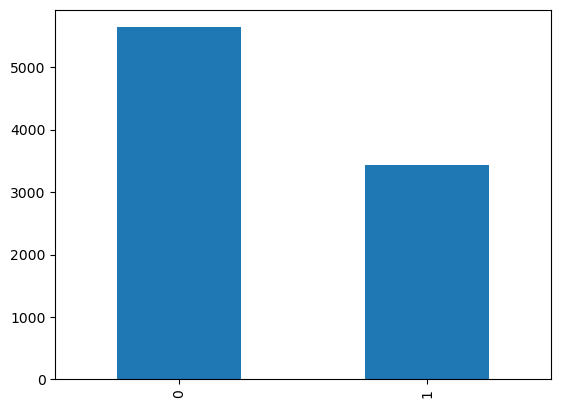

In [35]:
df.Converted.value_counts().plot.bar()

In [36]:
# let's find the conversion rate

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

Overall conversion rate is 38%. 

__Lead Origin__

The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

In [37]:
# check the values in Lead Origin variable

df["Lead Origin"].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

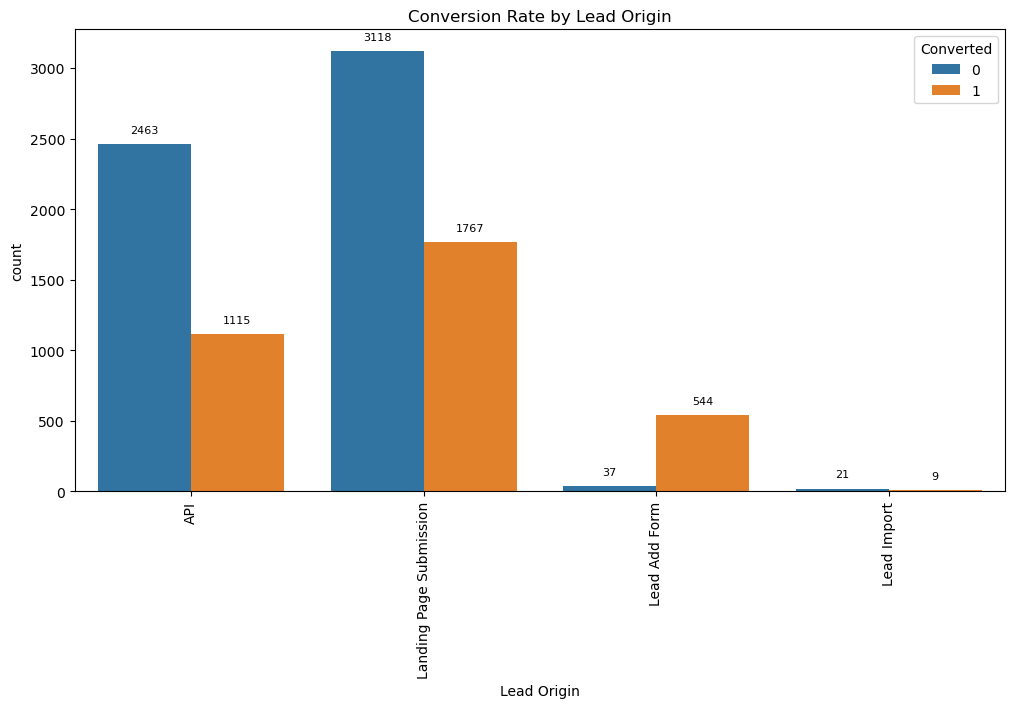

In [38]:
# Checking the conversion in Lead Origin

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='Lead Origin', hue='Converted')
plt.title("Conversion Rate by Lead Origin")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
plt.show()

Insight:

- Landing Page Submissions & API have a higher conversion rate, but they generate a significant number of leads. 
- The Lead Add Form, while having a high conversion rate, does not generate many leads. 
- The number of leads from Lead Imports is also quite low. 

To improve the overall lead conversion rate, we should focus on increasing the conversion rate for API and Landing Page Submissions, while also working to generate more leads through the Lead Add Form.

---

__Lead Source__

The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

In [39]:
# checking the values in Lead Source variable

df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We see there are two Google's mentioned in the values. We need to replace 'google' with 'Google

In [40]:
# replace 'google' to 'Google'

df["Lead Source"] = df["Lead Source"].replace(['google'], 'Google')

In [41]:
# rechecking the values in Lead Source variable

df["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

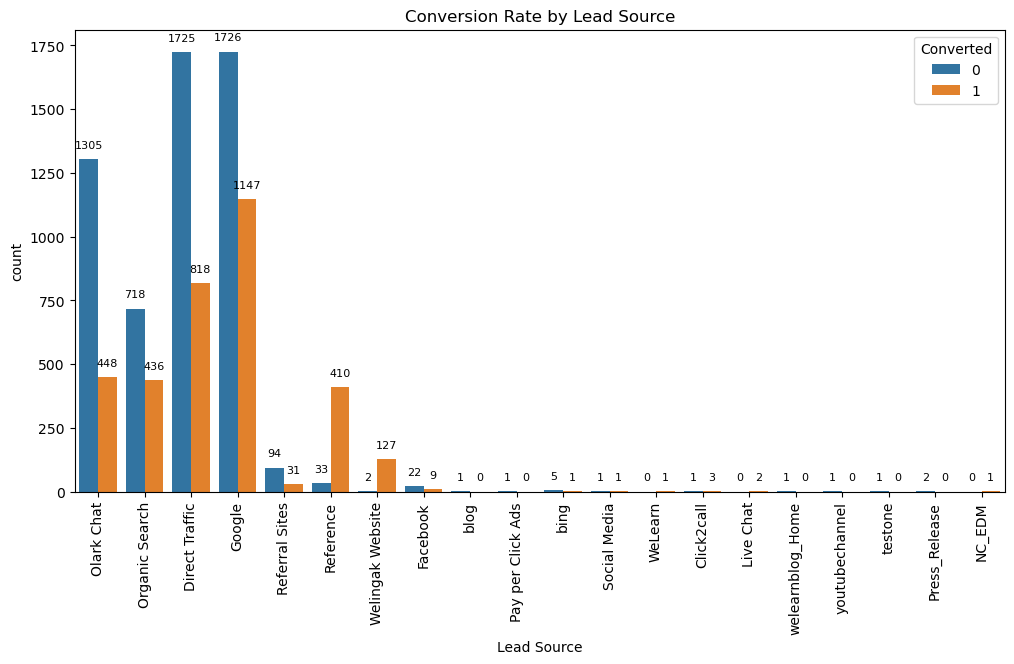

In [42]:
# Conversion Rate by Lead Source


plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Lead Source", hue="Converted")
plt.title("Conversion Rate by Lead Source")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
plt.show()

Insight:

__Google__ and __Direct traffic__ generate the highest number of leads. The conversion rate is particularly high for leads from __Referrals__ and the __Welingak website__. 

To boost the overall lead conversion rate, efforts should be directed toward improving the conversion rates for Olark chat, Organic Search, Direct traffic, and Google leads, while also increasing the volume of leads from referrals and the Welingak website.

---

__Do Not Email__

An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

In [43]:
# checking the values in this variable

df["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

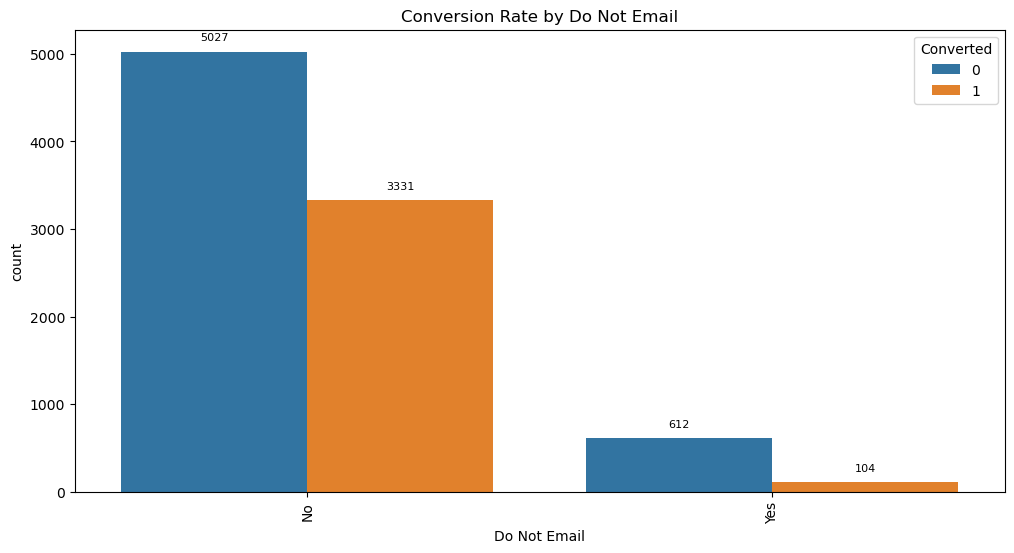

In [44]:
# Conversion Rate by Do Not Email


plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Do Not Email", hue="Converted")
plt.title("Conversion Rate by Do Not Email")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
plt.show()

Insight:

From the above graph, we can that major conversion has happend from the emails that have been sent

---

__Do Not Call__

An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.

In [45]:
# checking the values in this variable

df["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

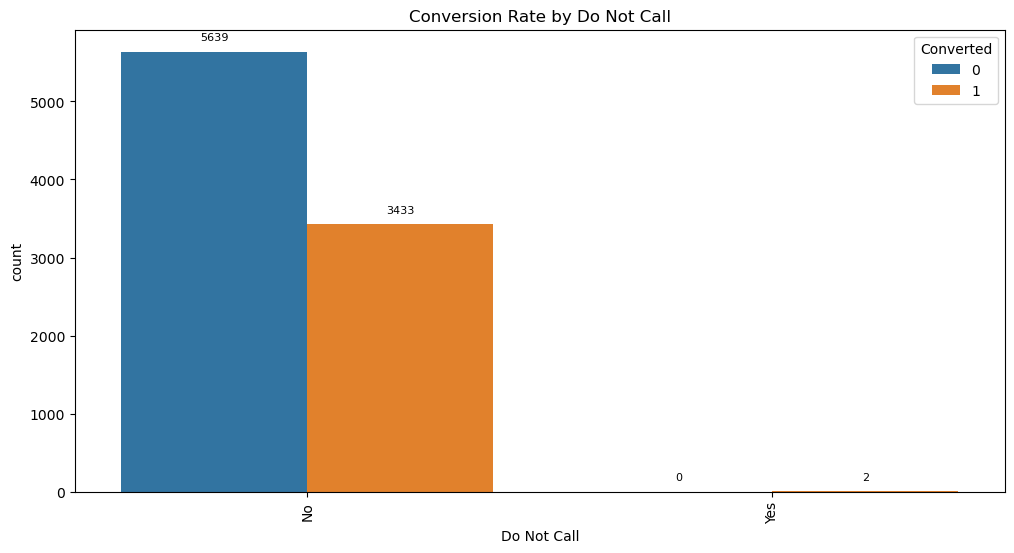

In [46]:
# Conversion Rate by Do Not Call


plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Do Not Call", hue="Converted")
plt.title("Conversion Rate by Do Not Call")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
plt.show()

Insight:

From the above graph, it can be noticed that major conversions happened when calls were made. However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

---

__TotalVisits__, __Total Time Spent on Website__, __Page Views Per Visit__

Lets look at these 3 numerical columns together.


- TotalVisits:	The total number of visits made by the customer on the website.
- Total Time Spent on Website:	The total time spent by the customer on the website.
- Page Views Per Visit: 	Average number of pages on the website viewed during the visits.

In [47]:
# checking the distribution in these

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


From the above information, we can see there are outliers in all Total Visits, and Page Views Per Visit

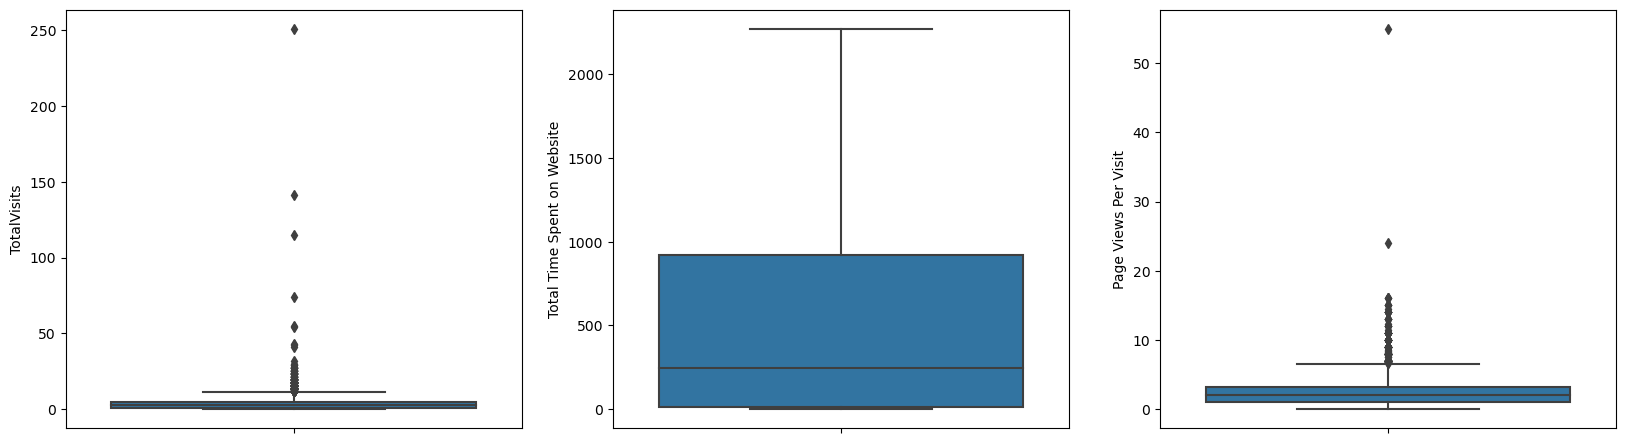

In [48]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits',  data = df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit',  data = df)
plt.show()

In [49]:
# check the distribution

df.TotalVisits.describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [50]:
# check the distribution in quantiles

df.TotalVisits.quantile([0.25,0.5,0.75,0.90, 0.95, 0.99])

0.25     1.0
0.50     3.0
0.75     5.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

We can see that the outliers lies beyond 0.99 quantile. We will remove the values greater beyond that in this variable

In [51]:
# Calculate the 99th percentile for Total Visits
quartile_total_visits_99 = df['TotalVisits'].quantile(0.99)

# Cap the values at the 99th percentile
df['TotalVisits'] = df['TotalVisits'].apply(lambda x: min(x, quartile_total_visits_99))

# Describe the data to see the effect
df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])


count    9074.000000
mean        3.343178
std         3.252302
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [52]:
# Calculate the 99th percentile for Total Visits
quartile_total_visits_99 = df['Page Views Per Visit'].quantile(0.99)

# Cap the values at the 99th percentile
df['Page Views Per Visit'] = df['Page Views Per Visit'].apply(lambda x: min(x, quartile_total_visits_99))

# Describe the data to see the effect
df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])


count    9074.000000
mean        2.341241
std         1.984635
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

In [53]:
df.shape

(9074, 27)

In [54]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.343178,482.887481,2.341241
std,23348.029512,0.485053,3.252302,545.256560,1.984635
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


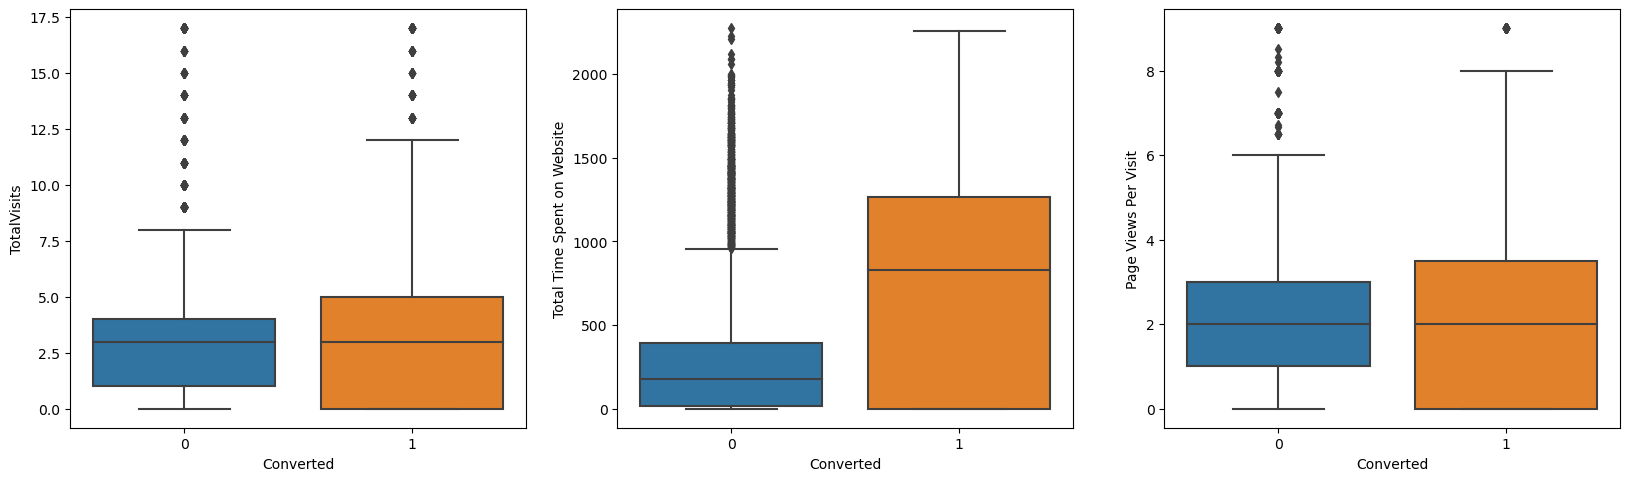

In [55]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', x='Converted',  data = df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website',x='Converted',  data = df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', x='Converted', data = df)
plt.show()

Insight:

The conversion rate is notably higher with increased Total Visits, Total Time Spent on Website, and Page Views Per Visit. Despite this, the median values for Total Visits and Page Views Per Visit are similar, indicating that while higher metrics in these areas are associated with better conversion rates, the typical values for these metrics are closely aligned.

---

__Last Activity__

Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

In [56]:
# checking the values in this variable

df["Last Activity"].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

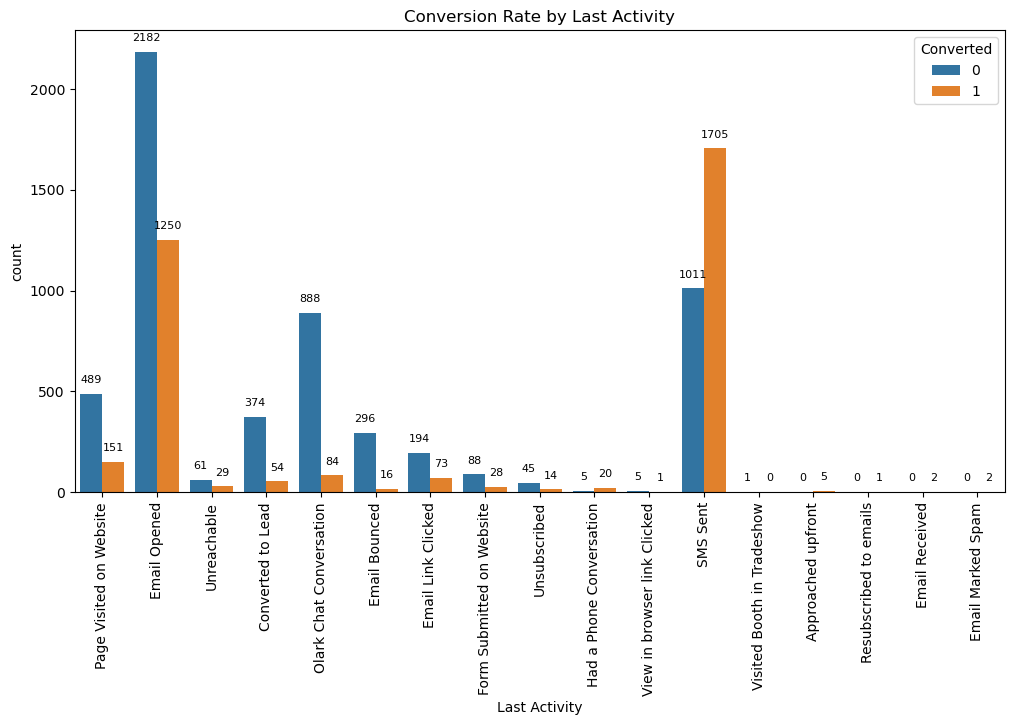

In [57]:
# Conversion Rate by Last Activity


plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Last Activity", hue="Converted")
plt.title("Conversion Rate by Last Activity")
plt.xticks(rotation=90)


# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
           
plt.show()

Insight:

As per the above graph, conversion rate is higher for 'SMS Sent'(customer who received and read the SMS), and 'Email Opened' (Customer who received the email and open and read the email). 'Had a Phone Conversation' also shows conversion rate.

---

__Specialization__

The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

In [58]:
# checking the values in this variable

df["Specialization"].value_counts()

Unknown                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

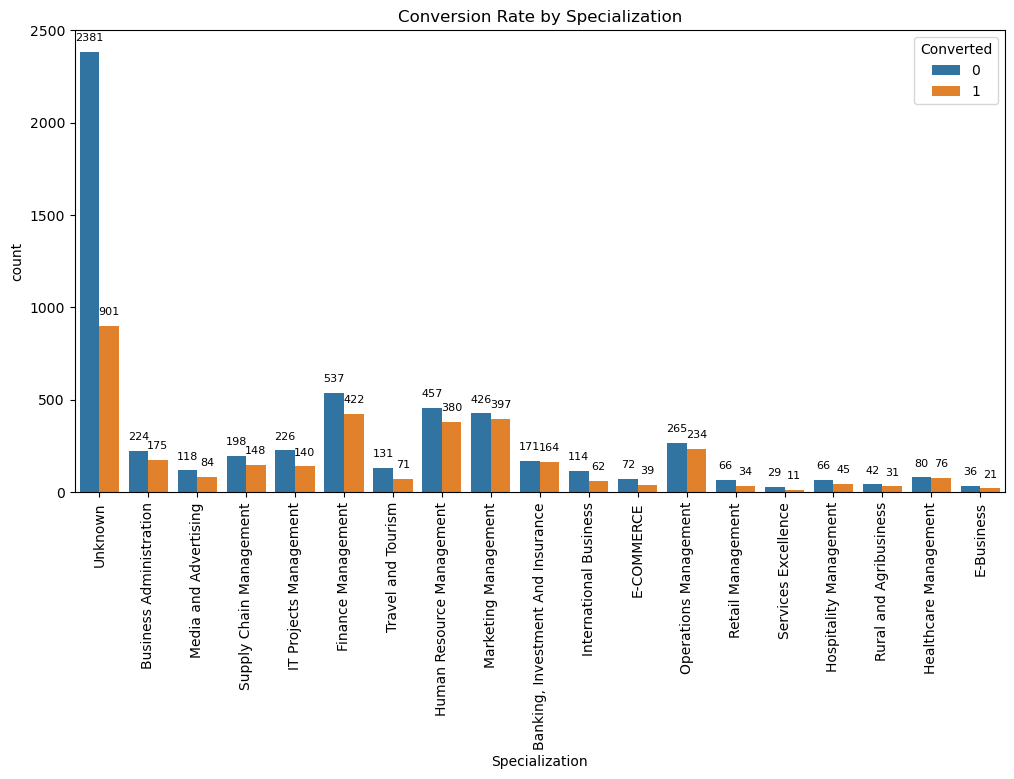

In [59]:
# Conversion Rate by Specialization


plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Specialization", hue="Converted")
plt.title("Conversion Rate by Specialization")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 

plt.show()

Insight:

As per the above graph, conversion rate is higher for 'Unknown', these are the cutsomer who did not specify theie specialization this might be due to most of them be students or unemployed. We can also see the conversion rate higher for the specialization Finance, Marketing, and Human Resource management.  

Overall we should focus more on customers who are from Finance, Marketing, Human resources, Operations management.

---

__What is your current occupation__

Indicates whether the customer is a student, umemployed or employed.

In [60]:
# checking the values in this variable

df["What is your current occupation"].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

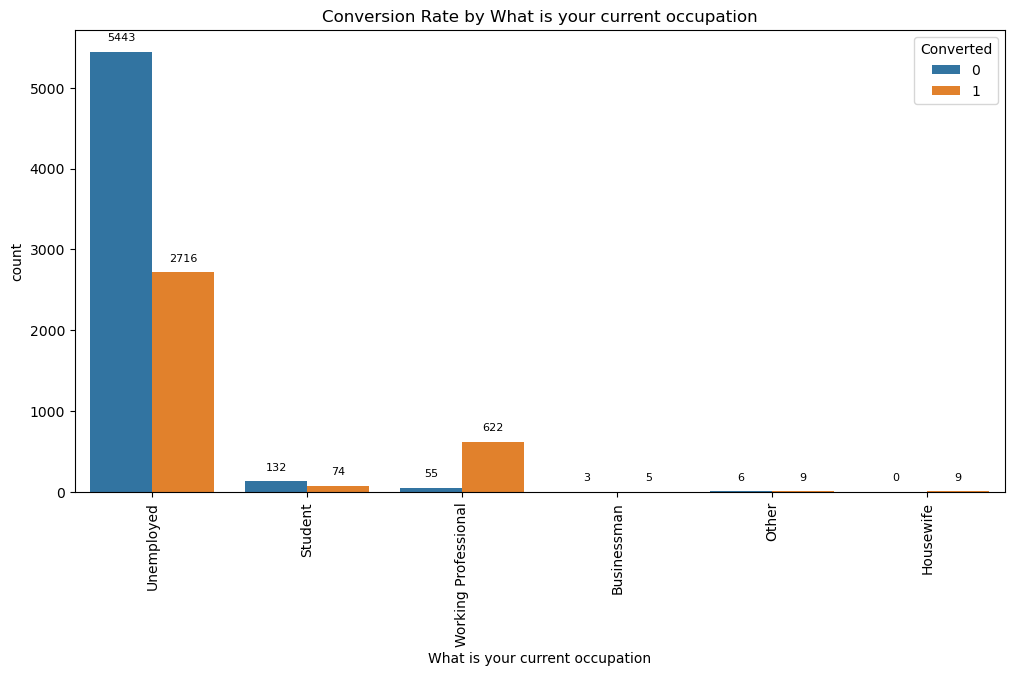

In [61]:
# Conversion Rate by What is your current occupation

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="What is your current occupation", hue="Converted")
plt.title("Conversion Rate by What is your current occupation")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insights:

Unemployed and Working Professional have higher conversion rate. It can also be noticed from the above chart that 
    - Out of 7 business men, 4 got converted
    - Out of 9 housewives, all 9 leads got converted.
    
We should focus more on them.

---

__Search__

Indicating whether the customer had seen the ad in any of the listed items.

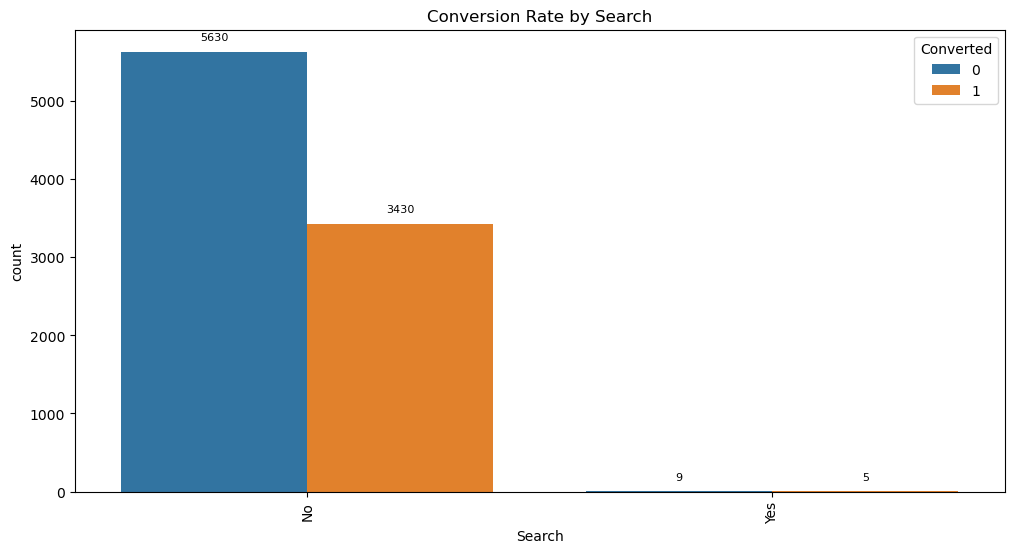

In [62]:
# Conversion Rate by Search

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Search", hue="Converted")
plt.title("Conversion Rate by Search")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

As per the above data, we can see that conversion rate is high for customer who did not search. No insights can be drawn from this column. We can drop this column.

In [63]:
# dropping the column

df = df.drop('Search', axis=1)

---

__Magazine__

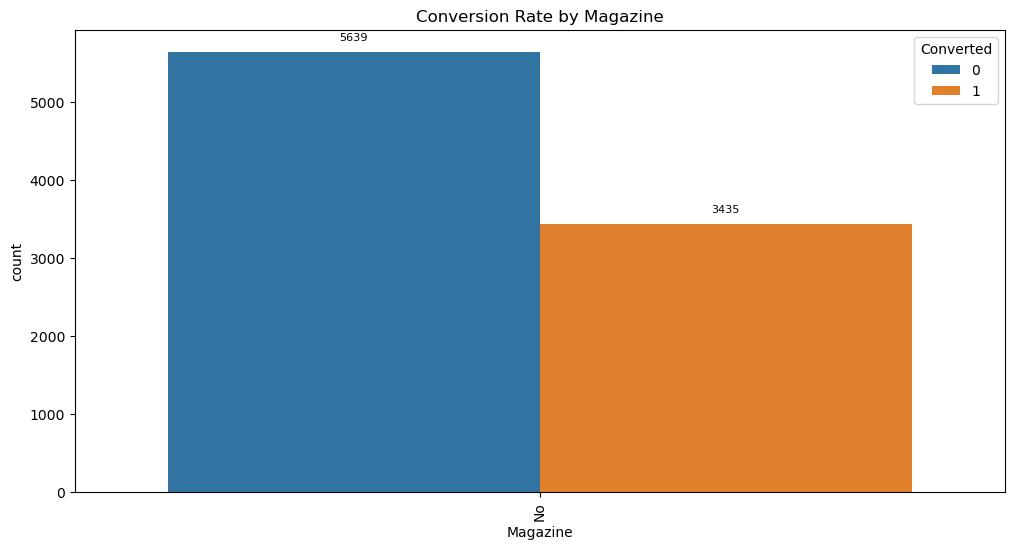

In [64]:
# Conversion Rate by Magazine

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Magazine", hue="Converted")
plt.title("Conversion Rate by Magazine")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

Magazine variable has only one value which indicates 'No'. We cannot drawn any insights from this. We can drop this column.

In [65]:
# dropping the column

df = df.drop('Magazine', axis=1)

---

__Newspaper Article__

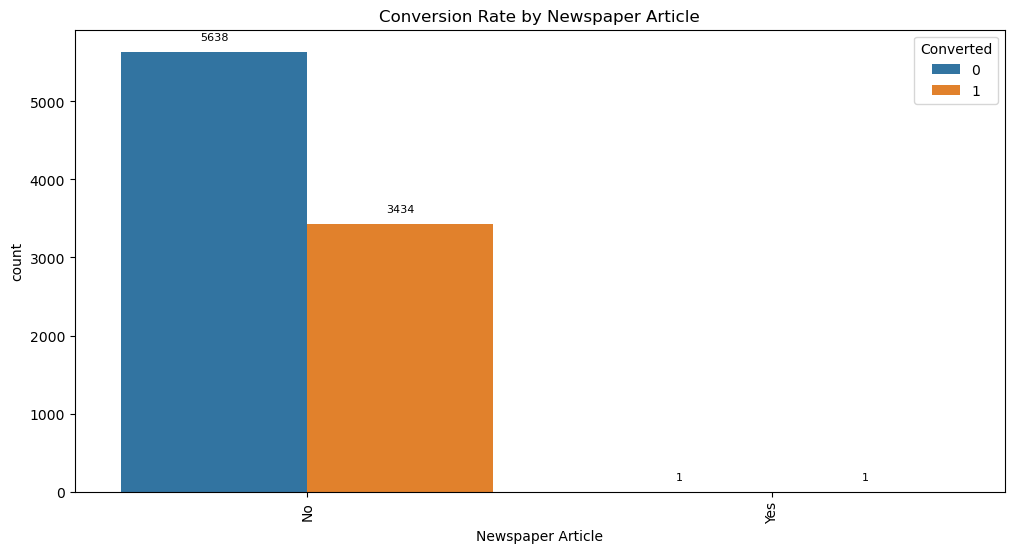

In [66]:
# Conversion Rate by Newspaper Article

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Newspaper Article", hue="Converted")
plt.title("Conversion Rate by Newspaper Article")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

Even this variable has only one value which indicates 'No'. We cannot drawn any insights from this. We can drop this column.

In [67]:
# dropping the column

df = df.drop('Newspaper Article', axis=1)

----

__X Education Forums__

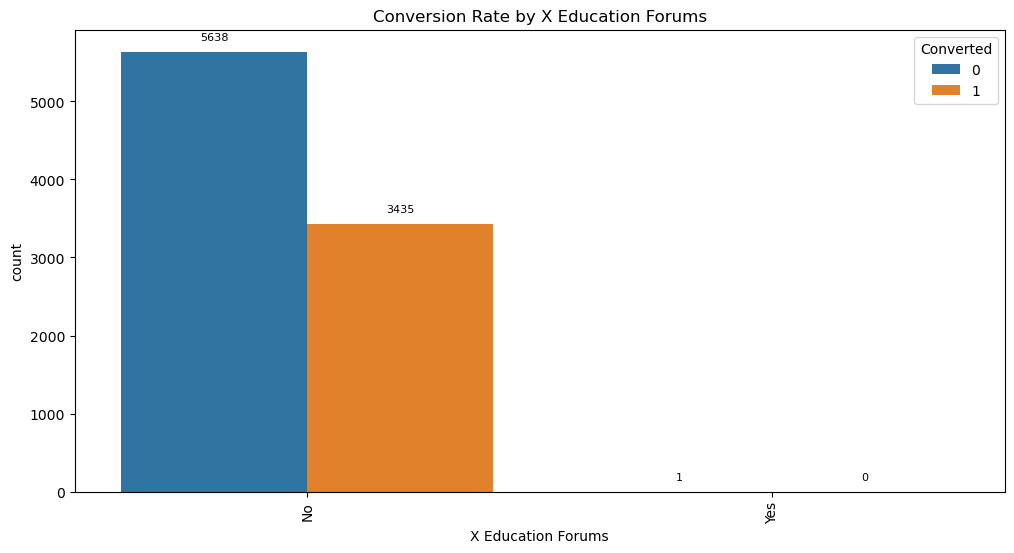

In [68]:
# Conversion Rate by X Education Forums

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="X Education Forums", hue="Converted")
plt.title("Conversion Rate by X Education Forums")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

Even this variable has only one value which indicates 'No'. We cannot drawn any insights from this. We can drop this column.

In [69]:
# dropping the column

df = df.drop('X Education Forums', axis=1)

---

__Newspaper__

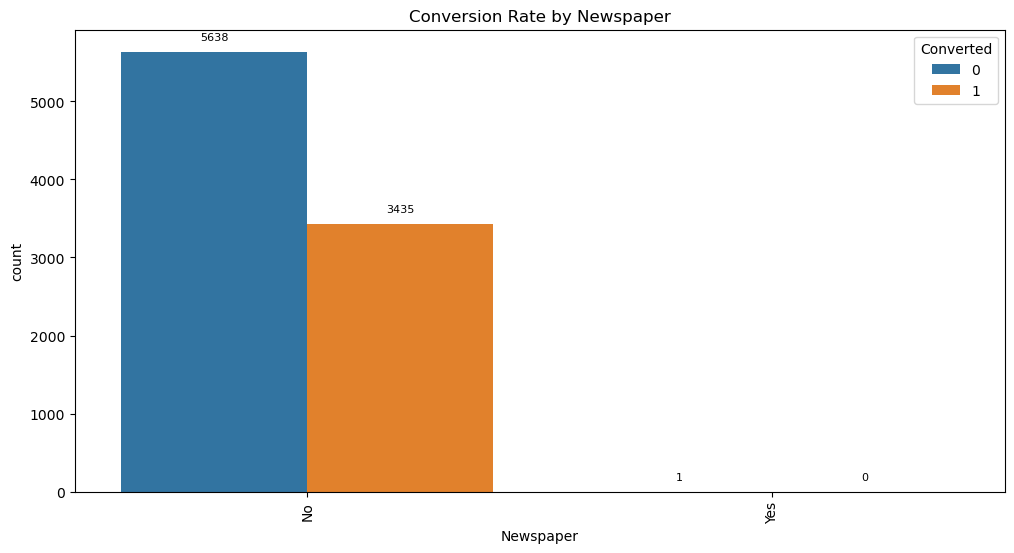

In [70]:
# Conversion Rate by Newspaper

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Newspaper", hue="Converted")
plt.title("Conversion Rate by Newspaper")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

Even this variable has only one value which indicates 'No'. We cannot drawn any insights from this. We can drop this column.

In [71]:
# dropping the column

df = df.drop('Newspaper', axis=1)

---

__Digital Advertisement__

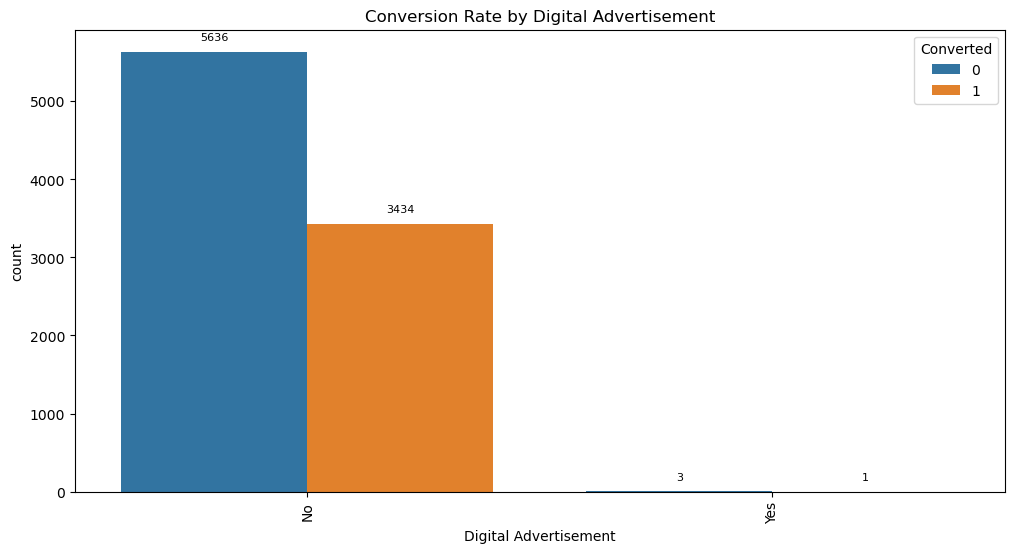

In [72]:
# Conversion Rate by Digital Advertisement

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Digital Advertisement", hue="Converted")
plt.title("Conversion Rate by Digital Advertisement")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

Even this variable has only one value which indicates 'No'. We cannot drawn any insights from this. We can drop this column.

In [73]:
# dropping the column

df = df.drop('Digital Advertisement', axis=1)

---

__Through Recommendations__

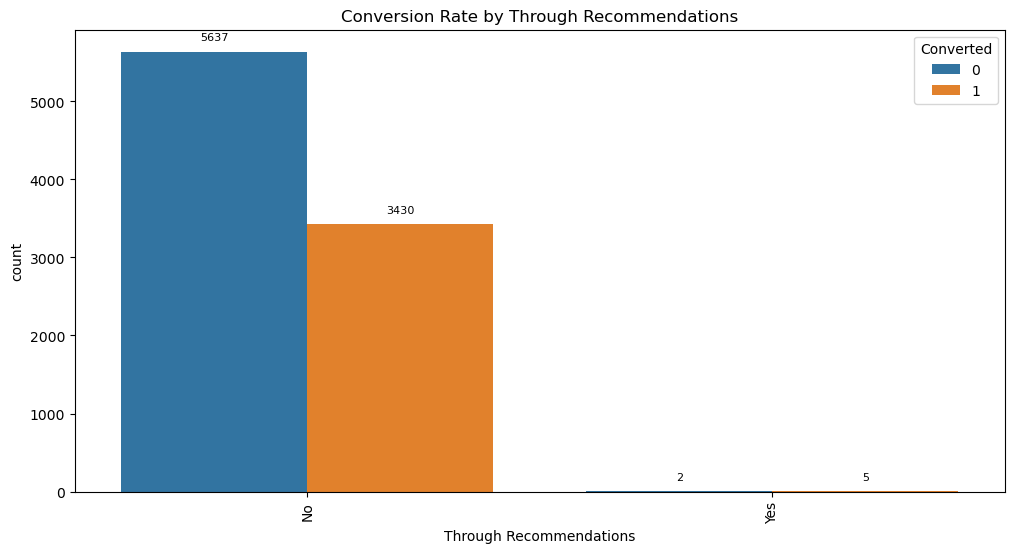

In [74]:
# Conversion Rate by Through Recommendations

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Through Recommendations", hue="Converted")
plt.title("Conversion Rate by Through Recommendations")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

As per the above chart, 6 customers got through recommendations, out of which 5 got converted. However most of the value is highly skewed towards no. We will drop this column

In [75]:
# dropping the column

df = df.drop('Through Recommendations', axis=1)

---

__Receive More Updates About Our Courses__

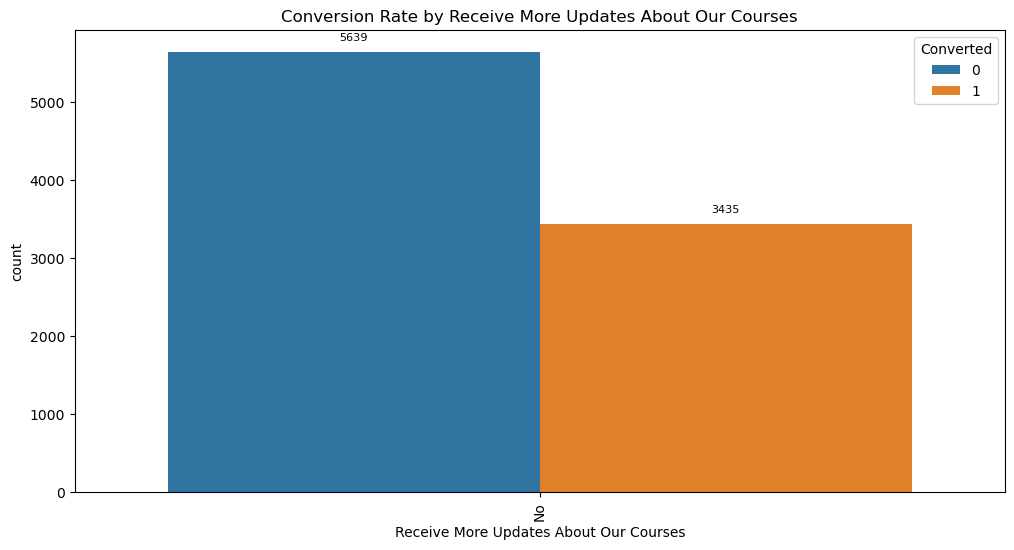

In [76]:
# Conversion Rate by Receive More Updates About Our Courses

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Receive More Updates About Our Courses", hue="Converted")
plt.title("Conversion Rate by Receive More Updates About Our Courses")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

This variable has only one variable which indiactes 'No'. We cannot drawn any insights from this, hence, we can drop this column.

In [77]:
# dropping the column

df = df.drop('Receive More Updates About Our Courses', axis=1)

---

__Update me on Supply Chain Content__

Indicates whether the customer wants updates on the Supply Chain Content.

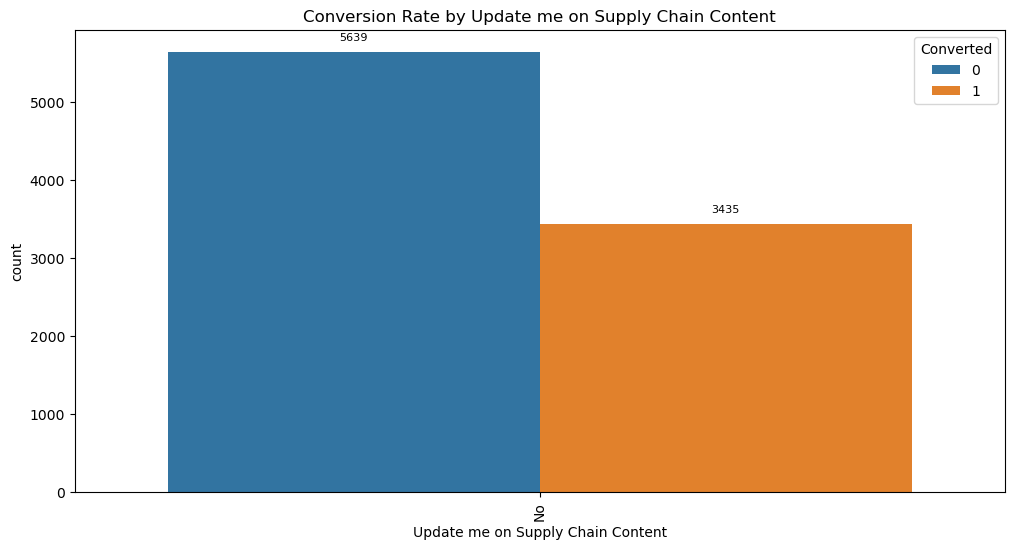

In [78]:
# Conversion Rate by Update me on Supply Chain Content

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Update me on Supply Chain Content", hue="Converted")
plt.title("Conversion Rate by Update me on Supply Chain Content")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

This variable has only one value, no insights can be drawn from this. We can drop.

In [79]:
# dropping the column

df = df.drop('Update me on Supply Chain Content', axis=1)

---

__Get updates on DM Content__

Indicates whether the customer wants updates on the DM Content.

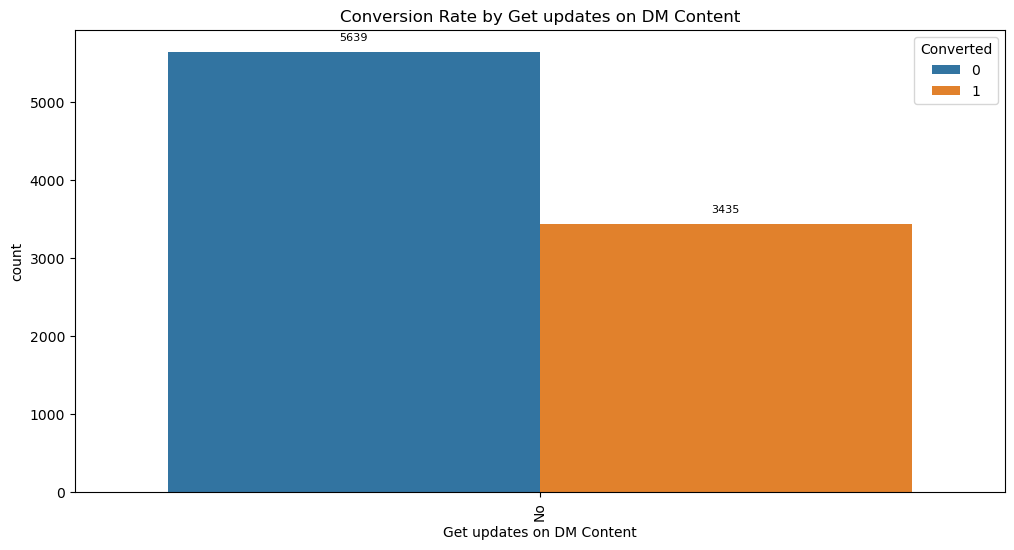

In [80]:
# Conversion Rate by Get updates on DM Content

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Get updates on DM Content", hue="Converted")
plt.title("Conversion Rate by Get updates on DM Content")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

This variable has only one value, no insights can be drawn from this. We can drop.

In [81]:
# dropping the column

df = df.drop('Get updates on DM Content', axis=1)

---

__City__

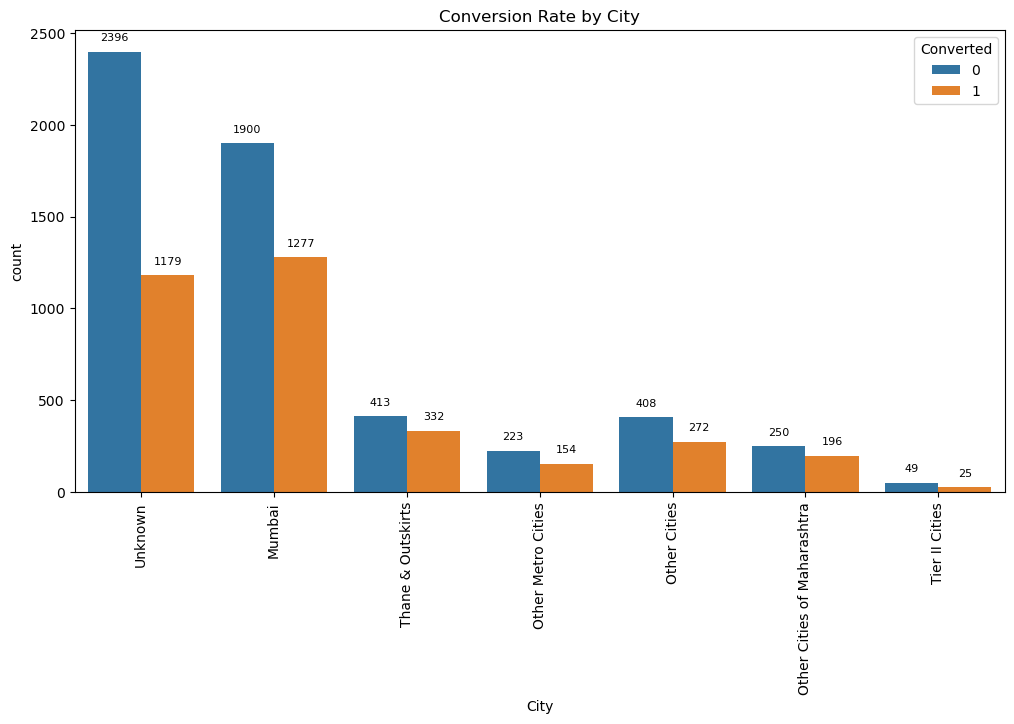

In [82]:
# Conversion Rate by City

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="City", hue="Converted")
plt.title("Conversion Rate by City")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

As per the above data, most conversions are from Mumbai City and followed by Unknown. 

---

__I agree to pay the amount through cheque__

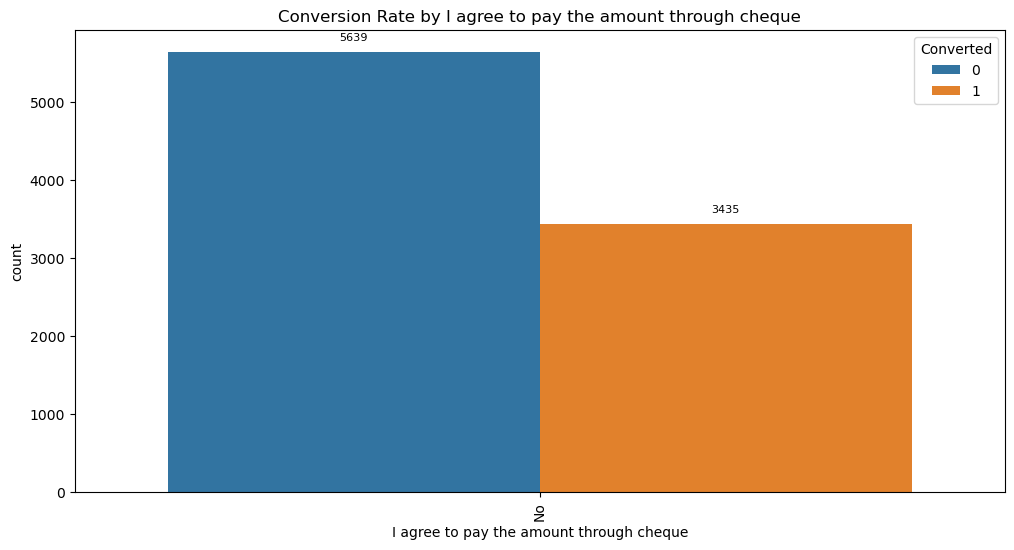

In [83]:
# Conversion Rate by I agree to pay the amount through cheque

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="I agree to pay the amount through cheque", hue="Converted")
plt.title("Conversion Rate by I agree to pay the amount through cheque")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:
    
In this variable, we have only one value. We cannot drawn any insights from this. We can drop this column.

In [84]:
# dropping the column

df = df.drop('I agree to pay the amount through cheque', axis=1)

---

__a free copy of Mastering The Interview__

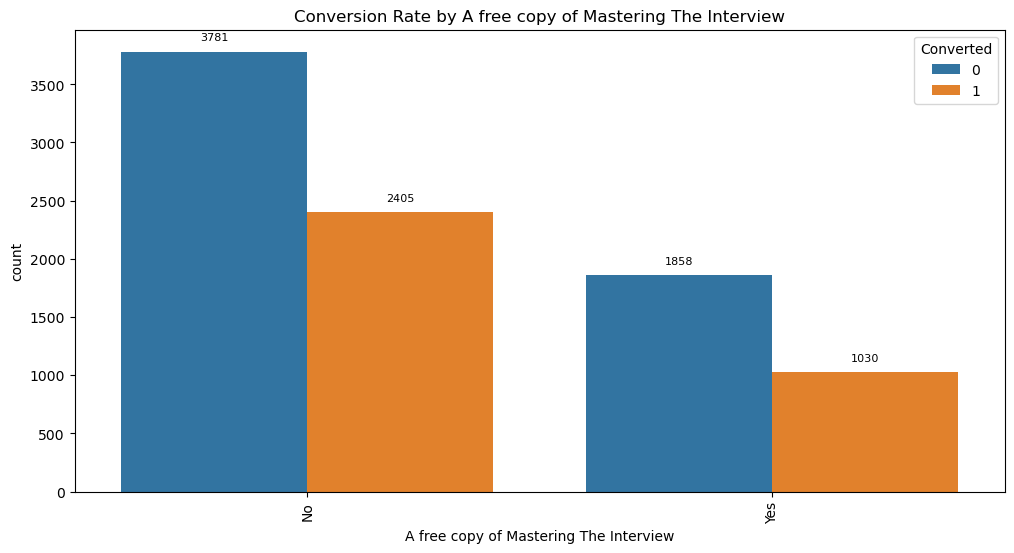

In [85]:
# Conversion Rate by A free copy of Mastering The Interview

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="A free copy of Mastering The Interview", hue="Converted")
plt.title("Conversion Rate by A free copy of Mastering The Interview")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

As per the above graph, we can say that the conversation rate is high for the customer who did not want a free copy of mastering the interview.

In [86]:
# dropping the column

df = df.drop('A free copy of Mastering The Interview', axis=1)

---

__Last Notable Activity__

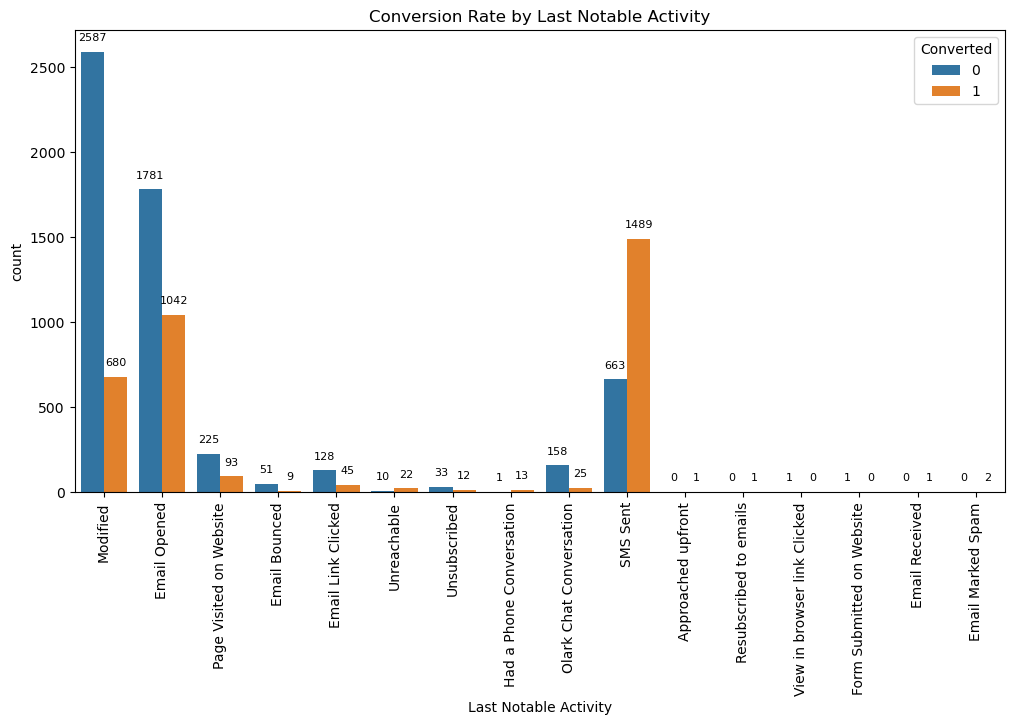

In [87]:
# Conversion Rate by Last Notable Activity

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="Last Notable Activity", hue="Converted")
plt.title("Conversion Rate by Last Notable Activity")
plt.xticks(rotation=90)

# Adding labels 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Rounding the numbers
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=8) 
    
plt.show()

Insight:

As we can notice from the above chart that the conversion rate is high for SMS-Sent, followed by Email Opened, and Modified.

----

In [88]:
# check the columns

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

In [89]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Unknown,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Unknown,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Mumbai,Modified


In [90]:
# we can drop the lead number column as this is not important for analysis

df = df.drop('Lead Number', axis=1)

In [91]:
# check the shape

df.shape

(9074, 14)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

---

### 4. Data Preparation

__i. Convert all the binary variables(Yes/No) to (1/0)__

In [93]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

__ii. Creating Dummy variables for the categorical features:__
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [94]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 
                                'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [95]:
dummy_data.shape

(9074, 82)

In [96]:
# Concatenating the dummy_data to the lead_data dataframe

df = pd.concat([df, dummy_data], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Unknown,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Unknown,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [97]:
df.shape

(9074, 96)

In [98]:
# drop the columns for which dummies were created

df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [99]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


__Splitting the data into train and test set__

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
# assigning the feature variables to X

X = df.drop(['Prospect ID', 'Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [102]:
# check the shape
X.shape

(9074, 87)

In [103]:
# assign target varaible to y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [104]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

__Scaling the Features__

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.417238,-0.160255,-0.177298,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.417238,-0.540048,-0.177298,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.034493,-0.888650,-1.183128,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.417238,1.643304,-0.177298,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.508645,2.017593,0.074159,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [107]:
# check the shape

X.shape

(9074, 87)

We have retained most of the data. Now we have 9074 rows and 87 columns. 

__Lead Conversion Rate__

In [108]:
Converted = (sum(df['Converted']/len(df['Converted'].index))*100)
Converted

37.85541106457747

We have almost 38% conversion rate.

---

### 5. Feature selection using RFE

Next step is to select the features which we will be using to build a model.

In [109]:
# import model and feature selection algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [110]:
# initialise the model

logreg = LogisticRegression()

In [111]:
# select the variables in RFE

rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [112]:
# looking at the variables selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 21),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 49),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Social Media', False, 20),
 ('Lead Source_WeLearn', False, 68),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 57),
 ('Lead Source_blog', False, 33),
 ('Lead Source_testone', False, 46),
 ('Lead Source_welearnblog_Ho

In [113]:
# viewing columns selected by RFE

cols = X_train.columns[rfe.support_]

In [114]:
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

----

### 6. Model Building

We will use this Stats model to assess the models

In [115]:
# import stats model

import statsmodels.api as sm

__Model 1__

In [116]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.5
Date:                Sun, 18 Aug 2024   Deviance:                       5161.1
Time:                        19:44:57   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4057
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7719      0.253      6.994      0.000       1.275       2.269
Do Not Email                                            -1.6037      0.201     -7.964      0.000      -1.998      -1.209
Total Time Spent on Website                              1.0995      0.041     27.064      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1392      0.128     -8.895      0.000      -1.390      -0.888
Lead Origin_Lead Add Form                                1.4354      0.894      1.605      0.108      -0.317       3.188
Lead Source_Olark Chat                                   1.0739      0.123      8.727      0.000       0.833       1.315
Lead Source_Reference                                    1.8961      0.918      2.065      0.039       0.097       3.696
Lead Source_Welingak Website                             4.5024      1.152      3.910      0.000       2.245       6.759
Last Activity_Converted to Lead                         -1.0515      0.229     -4.600      0.000      -1.500      -0.604
Last Activity_Email Bounced                             -1.2326      0.434     -2.843      0.004      -2.082      -0.383
Last Activity_Had a Phone Conversation                   1.8298      0.794      2.305      0.021       0.274       3.386
Last Activity_Olark Chat Conversation                   -1.3459      0.196     -6.874      0.000      -1.730      -0.962
Specialization_Unknown                                  -1.1236      0.126     -8.948      0.000      -1.370      -0.878
What is your current occupation_Housewife               22.2837   1.52e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Unemployed              -0.4804      0.216     -2.226      0.026      -0.903      -0.057
What is your current occupation_Working Professional     2.1570      0.286      7.539      0.000       1.596       2.718
Last Notable Activity_Email Link Clicked                -1.8973      0.257     -7.387      0.000      -2.401      -1.394
Last Notable Activity_Email Opened                      -1.4533      0.089    -16.330      0.000      -1.628      -1.279
Last Notable Activity_Modified                          -1.7580      0.101    -17.404      0.000      -1.956      -1.560
Last Notable Activity_Olark Chat Conversation           -1.4927      0.379     -3.942      0.000      -2.235      -0.751
Last Notable Activity_Page Visited on Website           -1.7265      0.203     -8.495      0.000      -2.125      -1.328
========================================================================================================================
"""

p-value of __What is your current occupation_Housewife__ is higher, we will drop this column

In [117]:
# dropping the column 'What is your current occupation_Housewife'

col1 = cols.drop('What is your current occupation_Housewife')

__Model 2__

In [118]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.7
Date:                Sun, 18 Aug 2024   Deviance:                       5167.4
Time:                        19:44:58   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4051
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8532      0.249      7.430      0.000       1.364       2.342
Do Not Email                                            -1.6054      0.201     -7.973      0.000      -2.000      -1.211
Total Time Spent on Website                              1.0987      0.041     27.070      0.000       1.019       1.178
Lead Origin_Landing Page Submission                     -1.1385      0.128     -8.896      0.000      -1.389      -0.888
Lead Origin_Lead Add Form                                1.4356      0.894      1.606      0.108      -0.316       3.188
Lead Source_Olark Chat                                   1.0714      0.123      8.709      0.000       0.830       1.313
Lead Source_Reference                                    1.9043      0.918      2.074      0.038       0.105       3.703
Lead Source_Welingak Website                             4.5033      1.151      3.911      0.000       2.246       6.760
Last Activity_Converted to Lead                         -1.0513      0.229     -4.601      0.000      -1.499      -0.603
Last Activity_Email Bounced                             -1.2317      0.433     -2.842      0.004      -2.081      -0.382
Last Activity_Had a Phone Conversation                   1.8308      0.794      2.306      0.021       0.275       3.387
Last Activity_Olark Chat Conversation                   -1.3458      0.196     -6.872      0.000      -1.730      -0.962
Specialization_Unknown                                  -1.1256      0.125     -8.971      0.000      -1.372      -0.880
What is your current occupation_Unemployed              -0.5620      0.211     -2.664      0.008      -0.975      -0.148
What is your current occupation_Working Professional     2.0744      0.282      7.345      0.000       1.521       2.628
Last Notable Activity_Email Link Clicked                -1.8929      0.256     -7.389      0.000      -2.395      -1.391
Last Notable Activity_Email Opened                      -1.4499      0.089    -16.298      0.000      -1.624      -1.276
Last Notable Activity_Modified                          -1.7585      0.101    -17.410      0.000      -1.957      -1.561
Last Notable Activity_Olark Chat Conversation           -1.4945      0.379     -3.946      0.000      -2.237      -0.752
Last Notable Activity_Page Visited on Website           -1.7281      0.203     -8.504      0.000      -2.126      -1.330
========================================================================================================================
"""

p-value of __Lead Origin_Lead Add Form__ is high, we will drop this column

In [119]:
# dropping the column Lead Origin_Lead Add Form

col1 = col1.drop('Lead Origin_Lead Add Form')

__Model 3__

In [120]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.1
Date:                Sun, 18 Aug 2024   Deviance:                       5170.2
Time:                        19:44:58   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8703      0.249      7.503      0.000       1.382       2.359
Do Not Email                                            -1.6080      0.201     -7.986      0.000      -2.003      -1.213
Total Time Spent on Website                              1.0967      0.041     27.059      0.000       1.017       1.176
Lead Origin_Landing Page Submission                     -1.1561      0.128     -9.059      0.000      -1.406      -0.906
Lead Source_Olark Chat                                   1.0646      0.123      8.670      0.000       0.824       1.305
Lead Source_Reference                                    3.3261      0.243     13.702      0.000       2.850       3.802
Lead Source_Welingak Website                             5.9304      0.733      8.094      0.000       4.494       7.367
Last Activity_Converted to Lead                         -1.0533      0.228     -4.611      0.000      -1.501      -0.606
Last Activity_Email Bounced                             -1.2315      0.434     -2.841      0.005      -2.081      -0.382
Last Activity_Had a Phone Conversation                   1.8260      0.794      2.300      0.021       0.270       3.382
Last Activity_Olark Chat Conversation                   -1.3502      0.196     -6.895      0.000      -1.734      -0.966
Specialization_Unknown                                  -1.1374      0.125     -9.075      0.000      -1.383      -0.892
What is your current occupation_Unemployed              -0.5595      0.211     -2.652      0.008      -0.973      -0.146
What is your current occupation_Working Professional     2.0739      0.282      7.341      0.000       1.520       2.628
Last Notable Activity_Email Link Clicked                -1.8960      0.256     -7.403      0.000      -2.398      -1.394
Last Notable Activity_Email Opened                      -1.4513      0.089    -16.315      0.000      -1.626      -1.277
Last Notable Activity_Modified                          -1.7593      0.101    -17.420      0.000      -1.957      -1.561
Last Notable Activity_Olark Chat Conversation           -1.4931      0.379     -3.942      0.000      -2.235      -0.751
Last Notable Activity_Page Visited on Website           -1.7220      0.203     -8.503      0.000      -2.119      -1.325
========================================================================================================================
"""

p-value of __Last Activity_Had a Phone Conversation__ is high, we will drop this column

In [121]:
# dropping the column Last Activity_Had a Phone Conversation

col1 = col1.drop('Last Activity_Had a Phone Conversation')

__Model 4__

In [122]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.4
Date:                Sun, 18 Aug 2024   Deviance:                       5176.7
Time:                        19:44:58   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4043
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8841      0.249      7.562      0.000       1.396       2.372
Do Not Email                                            -1.6137      0.201     -8.008      0.000      -2.009      -1.219
Total Time Spent on Website                              1.0955      0.040     27.063      0.000       1.016       1.175
Lead Origin_Landing Page Submission                     -1.1610      0.127     -9.112      0.000      -1.411      -0.911
Lead Source_Olark Chat                                   1.0554      0.123      8.605      0.000       0.815       1.296
Lead Source_Reference                                    3.3154      0.243     13.662      0.000       2.840       3.791
Lead Source_Welingak Website                             5.9210      0.733      8.081      0.000       4.485       7.357
Last Activity_Converted to Lead                         -1.0628      0.228     -4.655      0.000      -1.510      -0.615
Last Activity_Email Bounced                             -1.2353      0.434     -2.849      0.004      -2.085      -0.386
Last Activity_Olark Chat Conversation                   -1.3572      0.196     -6.932      0.000      -1.741      -0.973
Specialization_Unknown                                  -1.1394      0.125     -9.101      0.000      -1.385      -0.894
What is your current occupation_Unemployed              -0.5570      0.211     -2.639      0.008      -0.971      -0.143
What is your current occupation_Working Professional     2.0730      0.282      7.338      0.000       1.519       2.627
Last Notable Activity_Email Link Clicked                -1.9055      0.256     -7.441      0.000      -2.407      -1.404
Last Notable Activity_Email Opened                      -1.4617      0.089    -16.451      0.000      -1.636      -1.288
Last Notable Activity_Modified                          -1.7611      0.101    -17.460      0.000      -1.959      -1.563
Last Notable Activity_Olark Chat Conversation           -1.4939      0.379     -3.945      0.000      -2.236      -0.752
Last Notable Activity_Page Visited on Website           -1.7326      0.202     -8.559      0.000      -2.129      -1.336
========================================================================================================================
"""

#### Checking VIF Values

In [123]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,10.49
2,Lead Origin_Landing Page Submission,5.73
9,Specialization_Unknown,4.02
14,Last Notable Activity_Modified,2.99
3,Lead Source_Olark Chat,2.25
13,Last Notable Activity_Email Opened,2.12
8,Last Activity_Olark Chat Conversation,2.03
0,Do Not Email,1.86
7,Last Activity_Email Bounced,1.76
11,What is your current occupation_Working Profes...,1.65


In [124]:
# dropping the column  'What is your current occupation_Unemployed' because it has high VIF

col1 = col1.drop('What is your current occupation_Unemployed')

__Model 5__

In [125]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.8
Date:                Sun, 18 Aug 2024   Deviance:                       5183.5
Time:                        19:44:58   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4036
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3380      0.137      9.787      0.000       1.070       1.606
Do Not Email                                            -1.6086      0.202     -7.979      0.000      -2.004      -1.214
Total Time Spent on Website                              1.0959      0.040     27.080      0.000       1.017       1.175
Lead Origin_Landing Page Submission                     -1.1641      0.128     -9.130      0.000      -1.414      -0.914
Lead Source_Olark Chat                                   1.0618      0.123      8.656      0.000       0.821       1.302
Lead Source_Reference                                    3.3261      0.242     13.725      0.000       2.851       3.801
Lead Source_Welingak Website                             5.9126      0.733      8.070      0.000       4.477       7.349
Last Activity_Converted to Lead                         -1.0641      0.229     -4.656      0.000      -1.512      -0.616
Last Activity_Email Bounced                             -1.2351      0.434     -2.847      0.004      -2.085      -0.385
Last Activity_Olark Chat Conversation                   -1.3474      0.196     -6.889      0.000      -1.731      -0.964
Specialization_Unknown                                  -1.1499      0.125     -9.173      0.000      -1.396      -0.904
What is your current occupation_Working Professional     2.6124      0.196     13.361      0.000       2.229       2.996
Last Notable Activity_Email Link Clicked                -1.8946      0.255     -7.418      0.000      -2.395      -1.394
Last Notable Activity_Email Opened                      -1.4457      0.088    -16.336      0.000      -1.619      -1.272
Last Notable Activity_Modified                          -1.7558      0.101    -17.420      0.000      -1.953      -1.558
Last Notable Activity_Olark Chat Conversation           -1.4783      0.378     -3.911      0.000      -2.219      -0.737
Last Notable Activity_Page Visited on Website           -1.7218      0.202     -8.506      0.000      -2.118      -1.325
========================================================================================================================
"""

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,2.71
9,Specialization_Unknown,2.46
2,Lead Origin_Landing Page Submission,2.36
3,Lead Source_Olark Chat,2.08
8,Last Activity_Olark Chat Conversation,2.03
12,Last Notable Activity_Email Opened,1.87
0,Do Not Email,1.85
7,Last Activity_Email Bounced,1.76
14,Last Notable Activity_Olark Chat Conversation,1.37
1,Total Time Spent on Website,1.27


All the p-values are 0's/within the range and VIF values are below 3. Model 5 is our final model. We have 16 variables in the final model

---

__Making predictions on the train dataset__

In [127]:
# predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.190392
1012    0.141953
9226    0.185466
4750    0.878116
7987    0.652278
1281    0.764678
2880    0.096421
4971    0.968456
7536    0.849582
1248    0.611624
dtype: float64

In [128]:
# Reshaping into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1903921 , 0.14195316, 0.18546634, 0.87811559, 0.65227791,
       0.76467772, 0.09642103, 0.96845619, 0.84958245, 0.61162381])

In [129]:
#Creating a dataframe with the actual Converted flag and the predicted probability

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.190392,3009
1,0,0.141953,1012
2,0,0.185466,9226
3,1,0.878116,4750
4,1,0.652278,7987


In [130]:
#Selecting an arbitrary cut-off probability point of 0.5 to find the predicted labels
#Creating a new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# check the data
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.190392,3009,0
1,0,0.141953,1012,0
2,0,0.185466,9226,0
3,1,0.878116,4750,1
4,1,0.652278,7987,1


__Implement Matrix__

In [131]:
# import the metrics

from sklearn import metrics

In [132]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3462  443]
 [ 717 1729]]


In [133]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3462      443
# converted            717       1729  

In [134]:
# Let's check the overall accuracy

print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.817351598173516


#### Specificity and Sensitivity

In [135]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [136]:
# Sensitivity of our logistic regression model

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7068683565004088


In [137]:
# Let us calculate specificity

print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8865556978233035


In [138]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted

print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11344430217669654


In [139]:
# calculate positive predictive value 

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7960405156537753


In [140]:
# Calculate Negative predictive value

print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8284278535534817


__Analysis of the Performance:__

We discovered that our specificity was strong at approximately 89%, but our sensitivity was only 71%. This discrepancy requires attention.

The sensitivity of 71% was primarily influenced by the arbitrary cut-off point of 0.5 that we selected. To improve our sensitivity, we need to optimize this cut-off point. To achieve this, we will utilize the ROC curve for better calibration.



__Plotting the ROC Curve__
The ROC curve provides valuable insights, including:
- __Tradeoff Between Sensitivity and Specificity:__ An increase in sensitivity typically results in a decrease in specificity.
- __Test Accuracy:__ The closer the curve adheres to the left-hand border and then the top border of the ROC space, the more accurate the test is.
- __Indication of Test Performance:__ If the curve approaches the 45-degree diagonal of the ROC space, it signifies a less accurate test.

In [141]:
def draw_roc(actual, probs):
    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    # Plot ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='k')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


In [142]:
# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
# y_train_pred_final.Converted: Actual binary labels (0 or 1) for the training data
# y_train_pred_final.Converted_prob: Predicted probabilities of the positive class (1) for the training data
# drop_intermediate=False: Keep all thresholds, including those that may not affect the ROC curve, 
# which gives a more detailed curve but may be less smooth

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob,drop_intermediate = False )

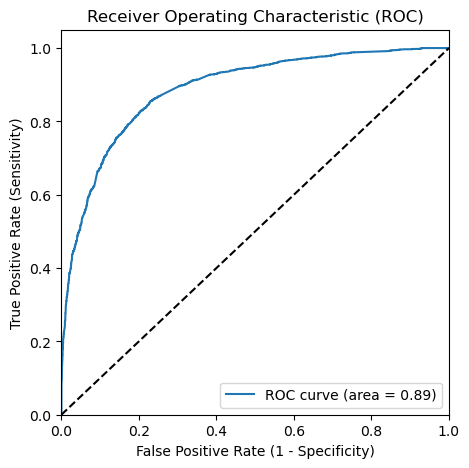

In [143]:
# roc curve

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

We have higher ROC curve area under (0.89). Our model is a good one. The next step is to find the optimal cut off point.

#### Finding the Optimal Cutoff Point

Previously, we selected an arbitrary cut-off value of 0.5. Now, we need to identify the optimal cut-off point, which is the probability value that achieves a balance between sensitivity and specificity. The following section will focus on determining this ideal cut-off value.

In [144]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.190392,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.141953,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.185466,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.878116,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.652278,7987,1,1,1,1,1,1,1,1,0,0,0


In [145]:
# import confusion matrix

from sklearn.metrics import confusion_matrix

In [146]:
# calculating accuracy, sensitivity, and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.599276  0.972608  0.365429
0.2   0.2  0.759408  0.908422  0.666069
0.3   0.3  0.802708  0.849959  0.773111
0.4   0.4  0.814202  0.782502  0.834059
0.5   0.5  0.817352  0.706868  0.886556
0.6   0.6  0.802236  0.603843  0.926504
0.7   0.7  0.783814  0.519624  0.949296
0.8   0.8  0.765864  0.437858  0.971319
0.9   0.9  0.723980  0.302944  0.987708


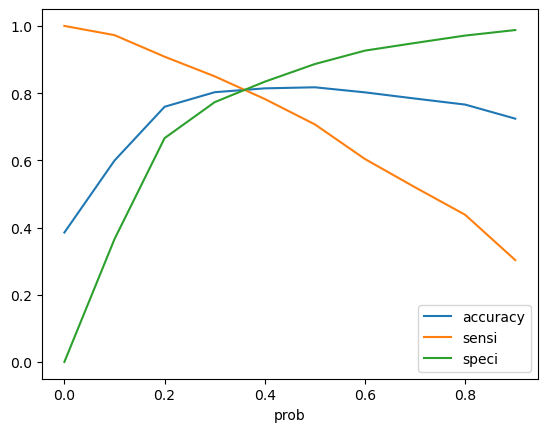

In [147]:
# Plotting the curve

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, we get the 0.34 as the optimum point to take as cutoff probablility.

In [148]:
# repeating the above steps for the cutoff 0.34

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.190392,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.141953,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.185466,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.878116,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.652278,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [149]:
# assigning lead score to the training data

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.190392,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.141953,1012,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.185466,9226,0,1,1,0,0,0,0,0,0,0,0,0,19
3,1,0.878116,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.652278,7987,1,1,1,1,1,1,1,1,0,0,0,1,65


---

### 7. Model Evaluation

In [150]:
# let's first check the accuracy

print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8083766336010078


In [151]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3114,  791],
       [ 426, 2020]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# sensitivity

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8258381030253475


In [154]:
# specificity

print("Specificity :",TN / float(TN+FP))

Specificity : 0.7974391805377721


In [155]:
# false positove rate

print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.20256081946222793


In [156]:
# Positive predictive value 

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7186054784774102


In [157]:
# Negative predictive value

print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8796610169491526


In [158]:
# Let's also check Precision and Recall
#Precision also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
# Recall also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3462,  443],
       [ 717, 1729]], dtype=int64)

In [159]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7960405156537753


In [160]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7068683565004088


In [161]:
# import the metrics

from sklearn.metrics import precision_score, recall_score

In [162]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7960405156537753


In [163]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7068683565004088


In [164]:
# precision and recall tradeoff

from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

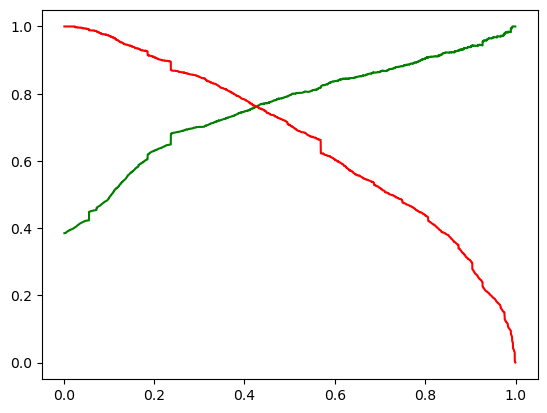

In [166]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

__Observation on Train data__

We observe the below values after running the model on train data:

- Accuracy: 80.8%
- Specificity: 82.5%
- Sensitivity: 79.7%

#### Making Predictions on the test data set

In [167]:
# scaling the test data

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [168]:
# assigning the columns selected by the final model to the X_test 

X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [169]:
# we need to explicitly add the constant
# adding the constant

X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.128329
1490    0.967979
7936    0.110790
4216    0.873745
3830    0.128315
1800    0.627045
6507    0.368052
4821    0.294332
4223    0.926925
4714    0.185466
dtype: float64

In [170]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [171]:
# Let's see the head
y_pred_1.head()

,0
3271,0.128329
1490,0.967979
7936,0.110790
4216,0.873745
3830,0.128315


In [172]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [173]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [174]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [175]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [176]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.128329
1,1,1490,0.967979
2,0,7936,0.110790
3,1,4216,0.873745
4,0,3830,0.128315


In [177]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [178]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [179]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.128329
1,1490,1,0.967979
2,7936,0,0.110790
3,4216,1,0.873745
4,3830,0,0.128315


In [180]:
# adding a final_prediction column

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [181]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.128329,0
1,1490,1,0.967979,1
2,7936,0,0.110790,0
3,4216,1,0.873745,1
4,3830,0,0.128315,0


In [182]:
# now check the accuracy

print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8024237972824091


In [183]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1381,  353],
       [ 185,  804]], dtype=int64)

In [184]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
# sensitivity
print("Sensitivity :",TP / float(TP+FN))

# specificity
print("Specificity :",TN / float(TN+FP))



Sensitivity : 0.8129423660262892
Specificity : 0.7964244521337946


In [186]:
# assigning lead score to the test data

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.128329,0,13
1,1490,1,0.967979,1,97
2,7936,0,0.110790,0,11
3,4216,1,0.873745,1,87
4,3830,0,0.128315,0,13


__Observation on Test:__

After running the model on the Test Data , we obtain

- Accuracy : 80.2%
- Sensitivity : 81.2%
- Specificity : 79.6%

---

### 8. Results on Observations

### i. Comparing the Train and Test performance metrics:

__Observation on Train data__

We observe the below values after running the model on train data:

- Accuracy: 80.8%
- Specificity: 82.5%
- Sensitivity: 79.7%

__Observation on Test data__

After running the model on the Test Data , we obtain

- Accuracy : 80.2%
- Sensitivity : 81.2%
- Specificity : 79.6%


Given the objective of improving lead conversion rates for X Education from 30% to 80%, the model’s performance metrics indicate promising results:

### Inference from Model Results:

__Alignment with Business Goal:__ The model achieves an accuracy of approximately 80% on both train and test data, closely aligning with the business objective of reaching an 80% lead conversion rate. This suggests that the model is effective in identifying potential leads that are likely to convert.

__Model Performance Consistency:__ The performance metrics—specificity, sensitivity, and accuracy—are consistent between the train and test datasets, which indicates that the model generalizes well and is not overfitting. This consistency gives confidence that the model's predictions are reliable and can be trusted to guide business decisions.

__Sensitivity and Specificity Balance:__ The model’s sensitivity (ability to correctly identify leads that will convert) and specificity (ability to correctly identify leads that will not convert) are well-balanced. This balance is crucial for optimizing sales efforts, ensuring that the sales team focuses on genuine 'Hot Leads' while minimizing time spent on less promising ones.

__Impact on Sales Strategy:__ With this model, the sales team can prioritize leads with a higher likelihood of conversion, directly addressing the inefficiency problem stated in the business problem. By improving focus on high-probability leads, the model supports the strategic goal of enhancing lead conversion rates and thereby increasing overall revenue.

---

### ii. Finding leads which should be contacted

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [187]:
# finsing hot leads

hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.967979,1,97
3,4216,1,0.873745,1,87
8,4223,1,0.926925,1,93
16,1946,1,0.928641,1,93
21,2461,1,0.994100,1,99
...,...,...,...,...,...
2694,1566,1,0.945932,1,95
2699,6461,1,0.964486,1,96
2703,5741,1,0.917206,1,92
2715,6299,1,0.886275,1,89


There are 386 leads which can be contacted and have a higher chance of getting converted. 

In [188]:
#The Prospect ID to be contacted

print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049,
       1518, 4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947,
       4807,  446,  789, 5805, 3758, 1561,  737, 9034, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 6532, 4498, 5797, 8687,  831, 7653, 4149,  243, 6743, 3307,
       3976, 5769, 1051, 1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292,
       6913, 6015, 1481,  785, 3265, 3285, 7433, 2460, 3858, 3810, 2009,
       8106,  373, 3055, 7417, 4179, 8076, 8568, 7268, 4353, 6784, 6754,
       7236, 2960, 7753, 3983,  802, 8745, 4717,  505, 8509, 6094, 4992,
       7036, 2680, 7065,  112, 6149, 7157, 3827, 7175, 1675, 6999, 5826,
       8492, 6499, 2481, 3439, 4612, 7129, 4793, 1557, 4837, 2495,  822,
       2378, 5090, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489, 2961,
       1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174, 2674,
       8065, 2095, 1568, 8597, 4865, 3535, 4708, 13

---

### iii. Important features in our model

In [189]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.912559
Lead Source_Reference                                   3.326133
What is your current occupation_Working Professional    2.612434
const                                                   1.337992
Total Time Spent on Website                             1.095857
Lead Source_Olark Chat                                  1.061814
Last Activity_Converted to Lead                        -1.064091
Specialization_Unknown                                 -1.149910
Lead Origin_Landing Page Submission                    -1.164113
Last Activity_Email Bounced                            -1.235112
Last Activity_Olark Chat Conversation                  -1.347364
Last Notable Activity_Email Opened                     -1.445727
Last Notable Activity_Olark Chat Conversation          -1.478270
Do Not Email                                           -1.608638
Last Notable Activity_Page Visited on Website          -1.721757
Last Notable Activity_Mod

### Recommendations based on the above information:

__Focus on High-Conversion Lead Sources:__

__Welingak Website__ and __Reference__ sources have strong positive coefficients, indicating leads from these sources are more likely to convert. Prioritize follow-ups with these leads.

__Target Working Professionals:__

Leads identified as __Working Professionals__ show a high likelihood of conversion. Direct more sales efforts towards this demographic.

__Leads with High Website Engagement:__

Leads that have spent more time on the website are more engaged and show a higher likelihood of converting. These leads should be prioritized for follow-up calls.

__Engage with Olark Chat Leads:__

Leads originating from Olark Chat also demonstrate a higher likelihood of conversion, making them a valuable target for follow-up.

__Avoid Follow-Ups with Already Converted Leads:__

Leads whose last activity was 'Converted to Lead' are already on the path to conversion and may not need immediate follow-up.

__Reconsider Leads with Specific Last Activities:__

Leads whose last activity was 'Olark Chat Conversation' or 'Email Bounced' show lower conversion likelihood. Consider deprioritizing follow-ups with these leads.

__Re-evaluate Leads from Certain Origins and Specializations:__

Leads originating from 'Landing Page Submission' and those with a specialization of 'Others' are less likely to convert. Resources might be better allocated elsewhere.

__Respect Do Not Email Preferences:__

Leads that have opted 'Do not Email' as 'Yes' are significantly less likely to convert. Focus on alternative communication methods for these leads or deprioritize them.

__Assess Leads with Specific Notable Activities:__

Leads whose last notable activities were 'Page Visited on Website', 'Email Link Clicked', or 'Modified' also show lower conversion potential. Consider deprioritizing these leads in follow-up efforts.

---

### 9. Conclusion on Hypotheses

__Hypothesis 1: Leads that spend more time on the website are more likely to convert.__

__Validated:__ The analysis supports this hypothesis, as leads with higher engagement (spending more time on the website) show a higher likelihood of conversion. This is reflected in the positive coefficient for the "Total Time Spent on Website" variable, indicating a positive relationship between website engagement and conversion likelihood.

__Hypothesis 2: Certain lead sources (e.g., referrals, specific ads) have higher conversion rates.__

__Validated:__ The model’s output shows that certain lead sources, such as "Welingak Website" and "Reference," have strong positive coefficients, suggesting higher conversion rates. This confirms that not all lead sources are equal in conversion potential, and targeting those with higher conversion rates can improve overall efficiency.

__Hypothesis 3: Demographic factors like occupation and country might influence conversion likelihood.__

__Partially Validated:__ The analysis confirms that occupation, specifically leads identified as "Working Professionals," is a significant factor influencing conversion likelihood, as indicated by its positive coefficient. However, the hypothesis regarding country influence wasn't explicitly tested or observed in the provided data, so further analysis would be needed to explore that aspect.

__Overall Conclusion:__
The data analysis strongly supports the first two hypotheses, providing clear evidence that website engagement and certain lead sources are crucial factors in predicting lead conversion. The third hypothesis is partially validated, with occupation being an influential factor, though further exploration is needed for other demographic variables like country. These insights can be directly applied to refine X Education’s lead conversion strategy, making it more targeted and effective.

---

### 10. Overall Conclusion

Based on the analysis and model performance, several key insights can be drawn:

__Model Effectiveness:__
The model demonstrates strong predictive accuracy, aligning closely with the business objective of improving lead conversion rates to 80%. The consistency in performance metrics between the training and test datasets indicates that the model is reliable and generalizes well, making it a solid tool for guiding sales strategies.

__Targeted Sales Efforts:__
The model's output has identified 386 leads with a higher likelihood of conversion. By focusing on these leads, X Education can optimize sales efforts and improve efficiency, addressing the current inefficiency problem where the sales team spends time on leads with lower conversion potential.

__Validated Hypotheses:__
The analysis supports the hypotheses that:

Leads spending more time on the website are more likely to convert.
Certain lead sources, like referrals and specific online channels, have higher conversion rates.
Demographic factors, such as occupation, play a significant role in conversion likelihood.
Strategic Recommendations:
The recommendations based on the model's output provide actionable steps for X Education to enhance their lead conversion strategy. By prioritizing leads from high-conversion sources, targeting working professionals, and focusing on engaged leads, the company can better allocate resources and increase its conversion rate.

__Potential for Business Impact:__
By implementing these targeted strategies, X Education can significantly increase its lead conversion rate, moving closer to the desired 80%. This improvement will not only increase revenue but also optimize the sales team's efforts, ensuring that time and resources are spent on the most promising leads.

Overall, the model provides a clear pathway to achieving the business goal of a higher lead conversion rate, supporting strategic decision-making and enabling the company to make more informed calls on which leads to pursue.